In [ ]:
import pandas as pd
import numpy as np

from UtilityFunctions.get_data_path import get_path
from UtilityFunctions.flatten_dict import flatten_dictionary
from UtilityFunctions.run_query import run_query

businesses = pd.read_json(get_path("yelp_academic_dataset_business.json"), lines=True)
users = pd.read_json(get_path("yelp_academic_dataset_user.json"), lines=True)

# Businesses

### Number of businesses

In [ ]:
sparql_query = """

SELECT COUNT(?business)
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
}

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
len(businesses["business_id"].unique())

### Distribution of ratings

stars
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.5    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.5    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.5    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: stars, dtype: object

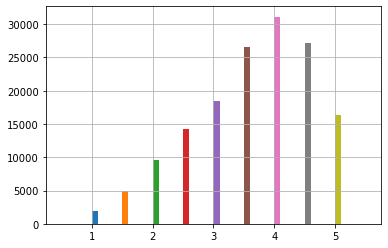

In [82]:
sparql_query = """

SELECT ?rating COUNT(?business)
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
    ?business schema:starRating ?rating .
}
GROUP BY ?rating

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
businesses.groupby('stars')['stars'].hist()

### Total average rating

In [ ]:
sparql_query = """

SELECT AVG(?rating) as ?averagerating
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
    ?business schema:starRating ?rating .
}

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
businesses['stars'].mean()

### Number of businesses in different geographical regions

In [ ]:
sparql_query = """

SELECT ?state ?city COUNT(?business)
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
    ?business schema:city ?city
    ?business schema:adressRegion ?state .
}
GROUP BY ?state ?city

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
businesses["business_id"][businesses["city"] == "Abington"].unique().size

### Geographical region with lowest average rating (er denne ikke dækket af de to foregående?)

In [ ]:
sparql_query = """

SELECT ?state ?city AVG(?rating) as ?average_rating
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
    ?business schema:adressRegion ?state .
    ?business schema:city ?city
    ?business schema:starRating ?rating .
}
GROUP BY ?state ?ciy
ORDER BY DESC(?average_rating)

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
businesses.groupby("state")['stars'].mean().sort_values()

### Different categories and numbers of businesses with that category

In [ ]:
sparql_query = """

SELECT ?category COUNT(?business)
WHERE {
    ?business rdfs:Class schema:LocalBusiness .
    ?business schema:category ?category .
}
GROUP BY ?category

"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
def str_split(string):
    if isinstance(string, str):
        return string.split(", ")
    else:
        return string


businesses["categories"] = businesses["categories"].apply(str_split)

category_biz_count = {}
for i in range(len(businesses)):
    if businesses["categories"][i]:
        for category in businesses["categories"][i]:
            category_biz_count[category] = category_biz_count.get(category, 0) + 1

category_biz_count["Restaurants"]

# Users

### Number of Users

In [ ]:
sparql_query = """

SELECT COUNT(?users)
WHERE {
    ?user rdfs:Class schema:Person .
}
"""

run_query(query=sparql_query, as_dataframe=True)

In [ ]:
len(users["user_id"].unique())